# Домашняя работа. Деревья решений.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](99-extra__ml-course-msu-Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'./data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [5]:
import pandas as pd

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url)

# Вывод первых строк для проверки
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0      

<ipython-input-9-f8678bc88223>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='coolwarm')


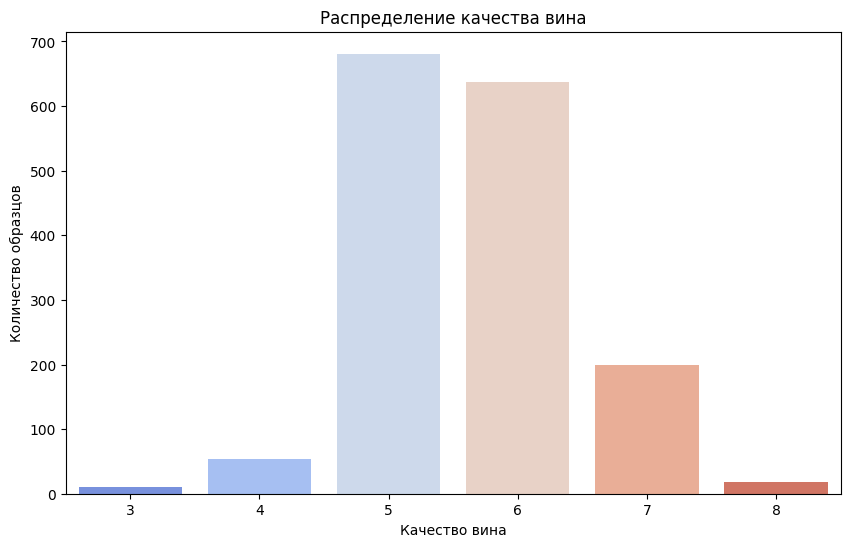

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных с указанием разделителя
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Проверим наличие столбцов
print(df.columns)

# Проверим первые несколько строк
print(df.head())

# Построение countplot для качества вина (quality)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='coolwarm')
plt.title('Распределение качества вина')
plt.xlabel('Качество вина')
plt.ylabel('Количество образцов')
plt.show()


In [11]:
import pandas as pd

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных с указанием разделителя
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, delimiter=';')

# Проверка названий столбцов
print("Названия столбцов:")
print(df.columns)

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Проверка, что X и y сформированы корректно
print("\nПервые несколько строк данных X:")
print(X.head())

print("\nПервые несколько значений целевой переменной y:")
print(y.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Названия столбцов:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Первые несколько строк данных X:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.

In [15]:
import pandas as pd

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных с указанием разделителя
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, delimiter=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Подсчет количества представителей каждого класса качества вина
# Сортируем по индексу для удобства
class_distribution = y.value_counts().sort_index()
print("Распределение классов качества вина:")
print(class_distribution)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Распределение классов качества вина:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [ ]:
В датасете есть классы, которые представлены сильно меньше других. Это создает проблему называемую дисбалансом классов. Дисбаланс классов может негативно повлиять на точность предсказаний модели и её способность правильно классифицировать редкие классы.

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов.

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [18]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Инициализация модели KNeighborsClassifier с 10 соседями
model = KNeighborsClassifier(n_neighbors=10)

# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.48125    0.534375   0.5        0.49375    0.55172414]
Среднее значение accuracy: 0.5122198275862069


In [20]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Создание пайплайна: сначала масштабирование (StandardScaler), затем классификация (KNeighborsClassifier)
# Пайплайн автоматически масштабирует данные перед обучением модели
pipeline = make_pipeline(
    StandardScaler(), KNeighborsClassifier(n_neighbors=10))

# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.5875     0.575      0.55625    0.575      0.61442006]
Среднее значение accuracy: 0.581634012539185


In [21]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeClassifier

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Инициализация модели RidgeClassifier
model = RidgeClassifier()

# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.56875    0.571875   0.546875   0.56875    0.66144201]
Среднее значение accuracy: 0.5835384012539185


In [22]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Инициализация модели DecisionTreeClassifier
# Используем фиксированный seed для воспроизводимости
model = DecisionTreeClassifier(random_state=42)

# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.559375   0.615625   0.61875    0.6625     0.63322884]
Среднее значение accuracy: 0.6178957680250783


In [26]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Инициализация модели BaggingClassifier с 100 деревьями решений
# В качестве базовой модели используем DecisionTreeClassifier
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.64375   0.70625   0.675     0.71875   0.7460815]
Среднее значение accuracy: 0.697966300940439


In [28]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Инициализация модели BaggingClassifier с 100 деревьями решений
# В качестве базовой модели используем DecisionTreeClassifier
# max_features=0.5 означает, что каждое дерево обучается только на половине случайно выбранных признаков
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, max_features=0.5, random_state=42)


# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.66875    0.6875     0.69375    0.6875     0.73667712]
Среднее значение accuracy: 0.6948354231974921


In [29]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
url = "https://drive.google.com/uc?id=1uSSbCdKFDQz8qmlcOKYa_1mYP3u9j67i"
df = pd.read_csv(url, sep=';')

# Разделение на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

# Инициализация модели RandomForestClassifier с 100 деревьями решений
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Настройка кросс-валидации на 5 фолдов
# 5 фолдов с перемешиванием данных
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации с метрикой 'accuracy'
# Оцениваем модель на каждом фолде
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print("Результаты accuracy на каждом фолде:", scores)
print("Среднее значение accuracy:", scores.mean())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результаты accuracy на каждом фолде: [0.653125   0.7        0.703125   0.709375   0.74294671]
Среднее значение accuracy: 0.7017143416927899


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

In [30]:
1. Разница в качестве между моделью KNeighborsClassifier с масштабированием и без него обусловлена тем, что K-ближайших соседей (K-Nearest Neighbors) является алгоритмом, чувствительным к масштабу данных.
2. Масштабирование данных не является важным для деревьев решений (и моделей на их основе, таких как случайные леса или градиентный бустинг), потому что деревья решений не используют расстояния для разделения данных.
Алгоритм деревьев решений работает по другому принципу, который не чувствителен к масштабу признаков. Основные причины, почему масштабирование не важно для деревьев решений: разбиения на основе значений признаков, отсутствие использования расстояний, индивидуальная обработка каждого признака, непрерывное обновление узлов.
3. Если некоторые признаки очень информативны, деревья, обучающиеся на всех признаках, часто будут делать разделения по этим признакам на первых уровнях дерева. Это приводит к доминированию сильных признаков и подавлению других признаков, которые могут также содержать полезную информацию.
Когда деревья обучаются на случайном подмножестве признаков, они вынуждены искать разделения по другим, менее очевидным признакам.
Это позволяет выявить важные взаимодействия между признаками, которые могли бы быть проигнорированы при обучении на всех признаках. В результате увеличивается устойчивость модели к переобучению, и она лучше обобщает на новых данных.
4. BaggingClassifier c 100 деревьев. Если в данных есть несколько признаков, которые оказывают наибольшее влияние на предсказания, случайный лес может выбирать их слишком часто для разделений на ранних уровнях деревьев.
Если эти признаки случайно отсутствуют в одной из выборок фолдов (или недостаточно представлены в отдельных деревьях), это может привести к значительным колебаниям в качестве предсказаний на различных фолдах кросс-валидации.

SyntaxError: invalid syntax (<ipython-input-30-df77792109d9>, line 1)

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

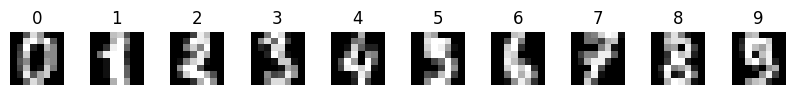

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Загружаем датасет с цифрами
digits = load_digits()

# Получаем изображения и метки (labels) цифр
images = digits.images
labels = digits.target

# Создаем холст размером 10x1, чтобы поместить 10 графиков в одну строку
fig, axes = plt.subplots(1, 10, figsize=(10, 1), gridspec_kw={'wspace': 0.5})

# Проходим по первым 10 изображениям и отображаем каждое из них
for i in range(10):
    # Отображаем изображение в оттенках серого
    axes[i].imshow(images[i], cmap='gray')
    # Устанавливаем заголовок как метку (цифру)
    axes[i].set_title(f'{labels[i]}')
    axes[i].axis('off')  # Отключаем оси для красоты

# Отображаем график
plt.show()

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [32]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Загрузка датасета
digits = load_digits()

# Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Здесь картинки представлены как векторы из 64 пикселей
y = digits.target  # Метки, соответствующие цифрам

# Создаем модель DecisionTreeClassifier с параметрами по умолчанию
clf = DecisionTreeClassifier()

# Настройка кросс-валидации с использованием 10 фолдов
# shuffle=True для перемешивания данных перед разделением
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию с метрикой accuracy
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Выводим результаты кросс-валидации
print(f"Accuracy на каждом фолде: {scores}")
print(f"Средняя accuracy: {scores.mean():.4f}")


Accuracy на каждом фолде: [0.87777778 0.83333333 0.83333333 0.83888889 0.87777778 0.83333333
 0.87777778 0.86592179 0.87709497 0.8547486 ]
Средняя accuracy: 0.8570


In [34]:
from sklearn.datasets import load_digits
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Загрузка датасета
digits = load_digits()

# Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Здесь картинки представлены как векторы из 64 пикселей
y = digits.target  # Метки, соответствующие цифрам

# Создание базовой модели DecisionTreeClassifier
base_model = DecisionTreeClassifier()

# Создание модели BaggingClassifier с 100 деревьями
bagging_clf = BaggingClassifier(
    estimator=base_model, n_estimators=100, random_state=42)

# Настройка кросс-валидации с использованием 10 фолдов
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию с метрикой accuracy
scores = cross_val_score(bagging_clf, X, y, cv=kf, scoring='accuracy')

# Выводим результаты кросс-валидации
print(f"Accuracy на каждом фолде: {scores}")
print(f"Средняя accuracy: {scores.mean():.4f}")

Accuracy на каждом фолде: [0.94444444 0.97222222 0.95555556 0.93888889 0.95555556 0.91111111
 0.97222222 0.93854749 0.94413408 0.96089385]
Средняя accuracy: 0.9494


In [36]:
from sklearn.datasets import load_digits
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Загрузка датасета
digits = load_digits()

# Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Векторизованные изображения (64 признака)
y = digits.target  # Метки (цифры от 0 до 9)

# Вычисление квадратного корня из числа признаков
n_features = X.shape[1]  # Число признаков в каждом векторе (64)
max_features = int(np.sqrt(n_features))  # Квадратный корень из числа признаков

# Создание базовой модели DecisionTreeClassifier с ограничением на max_features
base_model = DecisionTreeClassifier(max_features=max_features)

# Создание модели BaggingClassifier с 100 деревьями
bagging_clf = BaggingClassifier(
    estimator=base_model, n_estimators=100, random_state=42)

# Настройка кросс-валидации с использованием 10 фолдов
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию с метрикой accuracy
scores = cross_val_score(bagging_clf, X, y, cv=kf, scoring='accuracy')

# Выводим результаты кросс-валидации
print(f"Accuracy на каждом фолде: {scores}")
print(f"Средняя accuracy: {scores.mean():.4f}")


Accuracy на каждом фолде: [0.98333333 0.97777778 0.98333333 0.98333333 0.96111111 0.96666667
 0.98888889 0.98324022 0.97765363 0.97765363]
Средняя accuracy: 0.9783


In [38]:
from sklearn.datasets import load_digits
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Загрузка датасета
digits = load_digits()

# Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Векторизованные изображения (64 признака)
y = digits.target  # Метки (цифры от 0 до 9)

# Вычисление квадратного корня из числа признаков
n_features = X.shape[1]  # Число признаков в каждом векторе (64)
max_features = int(np.sqrt(n_features))  # Квадратный корень из числа признаков

# Создание модели BaggingClassifier с 100 деревьями
# Параметр max_features задается непосредственно в BaggingClassifier, что означает
# что каждое дерево будет обучаться на случайном подмножестве признаков.
bagging_clf = BaggingClassifier(
    # Используем дерево решений как базовую модель
    estimator=DecisionTreeClassifier(),
    n_estimators=100,                         # Используем 100 деревьев
    # Ограничиваем число признаков для каждого дерева как sqrt(N)
    max_features=max_features,
    # Фиксируем random_state для воспроизводимости
    random_state=42
)

# Настройка кросс-валидации с использованием 10 фолдов
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию с метрикой accuracy
scores = cross_val_score(bagging_clf, X, y, cv=kf, scoring='accuracy')

# Выводим результаты кросс-валидации
print(f"Accuracy на каждом фолде: {scores}")
print(f"Средняя accuracy: {scores.mean():.4f}")

Accuracy на каждом фолде: [0.96666667 0.94444444 0.96666667 0.95       0.95555556 0.93888889
 0.94444444 0.95530726 0.96089385 0.94972067]
Средняя accuracy: 0.9533


In [39]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Загрузка датасета
digits = load_digits()

# Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Векторизованные изображения (64 признака)
y = digits.target  # Метки (цифры от 0 до 9)

# Создание модели случайного леса с 100 деревьями
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Настройка кросс-валидации с использованием 10 фолдов
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию с метрикой accuracy
scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')

# Выводим результаты кросс-валидации
print(f"Accuracy на каждом фолде: {scores}")
print(f"Средняя accuracy: {scores.mean():.4f}")


Accuracy на каждом фолде: [0.97777778 0.97222222 0.98888889 0.98888889 0.96111111 0.96111111
 0.98888889 0.97765363 0.98882682 0.98882682]
Средняя accuracy: 0.9794


### 2.3 В чём разница? (3 балла)

Ответье на вопрос:

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

In [ ]:
Может быть
Оба метода включают ограничение на количество признаков, их применение на разных уровнях (на уровне узлов дерева и на уровне дерева в ансамбле)
приводит к различному влиянию на производительность модели. Ансамбли с большим разнообразием
деревьев обычно работают лучше, чем единичные слабые деревья, даже если деревья обучаются с ограничениями.

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

Количество деревьев: 1, Средняя accuracy: 0.7907
Количество деревьев: 5, Средняя accuracy: 0.9154
Количество деревьев: 10, Средняя accuracy: 0.9488
Количество деревьев: 15, Средняя accuracy: 0.9577
Количество деревьев: 50, Средняя accuracy: 0.9761
Количество деревьев: 100, Средняя accuracy: 0.9794
Количество деревьев: 150, Средняя accuracy: 0.9805
Количество деревьев: 200, Средняя accuracy: 0.9783
Количество деревьев: 300, Средняя accuracy: 0.9772


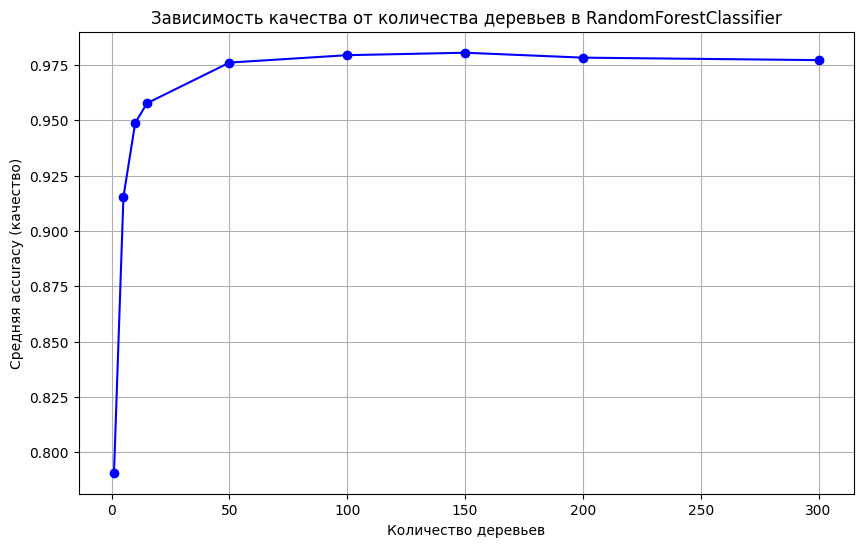

Лучшее качество достигается при количестве деревьев: 150, Accuracy: 0.9805


In [40]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Загрузка датасета
digits = load_digits()

# Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Векторизованные изображения (64 признака)
y = digits.target  # Метки (цифры от 0 до 9)

# Список количества деревьев, который мы будем перебирать
n_estimators_list = [1, 5, 10, 15, 50, 100, 150, 200, 300]

# Сохраним средние значения accuracy для каждого количества деревьев
mean_accuracies = []

# Настройка кросс-валидации с использованием 10 фолдов
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Цикл по количеству деревьев
for n_estimators in n_estimators_list:
    # Создание модели случайного леса с текущим количеством деревьев
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Выполнение кросс-валидации и вычисление среднего значения accuracy
    scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
    mean_accuracy = scores.mean()  # Среднее качество для текущего количества деревьев
    mean_accuracies.append(mean_accuracy)  # Сохраняем результат

    # Выводим промежуточные результаты для каждого количества деревьев
    print(
        f"Количество деревьев: {n_estimators}, Средняя accuracy: {mean_accuracy:.4f}")

# Построение графика зависимости количества деревьев от качества (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mean_accuracies,
         marker='o', linestyle='-', color='b')
plt.title('Зависимость качества от количества деревьев в RandomForestClassifier')
plt.xlabel('Количество деревьев')
plt.ylabel('Средняя accuracy (качество)')
plt.grid(True)
plt.show()

# Определение лучшего результата
best_n_estimators = n_estimators_list[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)
print(
    f"Лучшее качество достигается при количестве деревьев: {best_n_estimators}, Accuracy: {best_accuracy:.4f}")

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

Количество признаков: 1, Средняя accuracy: 0.9739
Количество признаков: 6, Средняя accuracy: 0.9761
Количество признаков: 11, Средняя accuracy: 0.9783
Количество признаков: 16, Средняя accuracy: 0.9716
Количество признаков: 21, Средняя accuracy: 0.9761
Количество признаков: 26, Средняя accuracy: 0.9716
Количество признаков: 31, Средняя accuracy: 0.9694
Количество признаков: 36, Средняя accuracy: 0.9655
Количество признаков: 41, Средняя accuracy: 0.9644
Количество признаков: 46, Средняя accuracy: 0.9633
Количество признаков: 51, Средняя accuracy: 0.9571
Количество признаков: 56, Средняя accuracy: 0.9538
Количество признаков: 61, Средняя accuracy: 0.9527


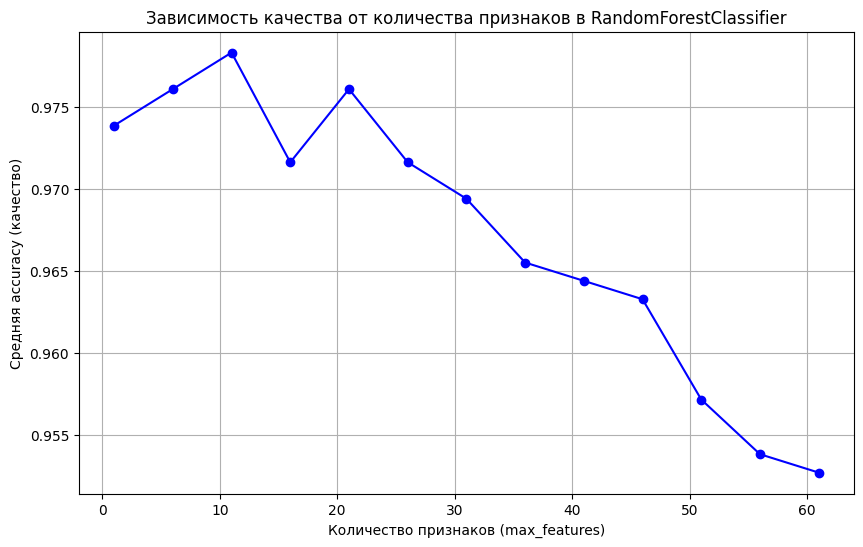

Лучшее качество достигается при количестве признаков: 11, Accuracy: 0.9783


In [41]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Шаг 1: Загрузка датасета
digits = load_digits()

# Шаг 2: Разделение данных на признаки (features) и метки (labels)
X = digits.data  # Векторизованные изображения (64 признака)
y = digits.target  # Метки (цифры от 0 до 9)

# Шаг 3: Список максимального количества признаков для перебора от 1 до 64 с шагом 5
max_features_list = list(range(1, 65, 5))  # От 1 до 64 с шагом 5

# Сохраним средние значения accuracy для каждого количества признаков
mean_accuracies = []

# Шаг 4: Настройка кросс-валидации с использованием 10 фолдов
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Шаг 5: Цикл по количеству признаков
for max_features in max_features_list:
    # Создание модели случайного леса с текущим max_features и 100 деревьями
    rf_clf = RandomForestClassifier(
        n_estimators=100, max_features=max_features, random_state=42)

    # Выполнение кросс-валидации и вычисление среднего значения accuracy
    scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
    mean_accuracy = scores.mean()  # Среднее качество для текущего значения max_features
    mean_accuracies.append(mean_accuracy)  # Сохраняем результат

    # Выводим промежуточные результаты для каждого значения max_features
    print(
        f"Количество признаков: {max_features}, Средняя accuracy: {mean_accuracy:.4f}")

# Шаг 6: Построение графика зависимости количества признаков от качества (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(max_features_list, mean_accuracies,
         marker='o', linestyle='-', color='b')
plt.title('Зависимость качества от количества признаков в RandomForestClassifier')
plt.xlabel('Количество признаков (max_features)')
plt.ylabel('Средняя accuracy (качество)')
plt.grid(True)
plt.show()

# Шаг 7: Определение лучшего результата
best_max_features = max_features_list[mean_accuracies.index(
    max(mean_accuracies))]
best_accuracy = max(mean_accuracies)
print(
    f"Лучшее качество достигается при количестве признаков: {best_max_features}, Accuracy: {best_accuracy:.4f}")

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

1. С увеличением числа деревьев увеличивается время и потребление ресурсов, необходимое для обучения модели. Чем больше деревьев, тем большее количество раз модель должна проходить через данные, строить и оценивать деревья. После определенного числа деревьев точность модели перестает расти существенно. Включение слишком большого числа деревьев (например, 5000) может дать лишь незначительное улучшение, и это улучшение, как правило, минимально по сравнению с затратами ресурсов. С увеличением числа деревьев до определенного порога точность модели будет улучшаться, но по мере дальнейшего увеличения количество улучшений становится всё меньше и меньше. Добавление деревьев выше этого порога практически не влияет на точность, но резко увеличивает вычислительные затраты.

2. Очень малые значения max_features (близко к 1) могут привести к низкому качеству, поскольку дерево не будет иметь достаточно информации для принятия обоснованных решений при разбиении узлов.
Слишком большие значения max_features (близко к числу всех признаков) могут увеличить точность на тренировочных данных, но при этом увеличат риск переобучения, что ухудшит точность на тестовых данных.
Умеренные значения (например, sqrt(N) для классификации) обеспечивают хороший баланс между случайностью и использованием информативных признаков, что часто приводит к оптимальной обобщающей способности модели.

3. Качество предсказаний модели случайного леса зависит от значения параметра max_features, потому что этот параметр влияет на:

 1. Сложность дерева (и, как следствие, на риск переобучения). max_features определяет, сколько признаков (из всех доступных) модель будет рассматривать при каждом разбиении узла дерева. Чем больше признаков доступно на каждом шаге, тем более точным (и потенциально сложным) будет разбиение. Большее значение max_features (когда доступны почти все признаки) позволяет дереву находить "лучшее" возможное разбиение на каждом шаге, что делает его очень точным на тренировочных данных. Однако это может привести к переобучению, поскольку дерево слишком сильно подстраивается под конкретные детали обучающей выборки, в том числе под шум и случайные закономерности. Меньшее значение max_features (ограничение числа признаков) делает модель более случайной и простой. Это может снизить риск переобучения, но в то же время дерево может упускать важную информацию при разбиении, что приведет к недообучению.
 2. Степень случайности разбиений, что важно для ансамблевых методов. Ограничение max_features делает деревья более разнообразными, так как каждое дерево строится на случайных подвыборках данных и признаков. Это снижает корреляцию между деревьями, что является ключевым фактором успеха случайных лесов.
 3. Баланс между смещением и вариативностью. Когда max_features слишком мал, дерево может не иметь достаточно информации для принятия качественных решений на каждом шаге, что приводит к высоким ошибкам и снижению точности на тестовых данных. Если max_features слишком велик, дерево может слишком сильно подстраиваться под обучающие данные, что также снижает его способность хорошо работать на новых данных.

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)